In [12]:
# 导入包
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn.datasets as ds
import matplotlib.colors
from sklearn.cluster import KMeans

In [13]:
#防止中文乱码属性的设置
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [14]:
#产生模拟数据
#make_blobs产生一个各个特征属性分布均匀的并符合高斯分布的聚类问题数据集
#n_samples样本数量n_features特征属性数目centers 聚类中心cluster_std 方差center_box位置范围shuffle 打乱
N = 1500
centers = 4
data,y = ds.make_blobs(N, n_features=2, centers=centers, random_state=170)
data2,y2 = ds.make_blobs(N, n_features=2, centers=centers,cluster_std=[1, 2.5, 0.5,1.5],random_state=170)
data3 = np.vstack((data[y == 0][:200], data[y == 1][:100], data[y == 2][:10], data[y == 3][:50]))
y3 = np.array([0] * 200 + [1] * 100 + [2] * 10 + [3] * 50)

In [15]:
# 模型构建
km = KMeans(n_clusters=centers, random_state=170)
km.fit(data,y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=170, tol=0.0001, verbose=0)

In [16]:
# 获取预测数据并获取簇中心点
y_hat = km.predict(data)
print("所有样本距离聚簇中心点的总距离和:", km.inertia_)
print("距离聚簇中心点的平均距离:", (km.inertia_ / N))
cluster_centers = km.cluster_centers_
print("聚簇中心点：", cluster_centers)

所有样本距离聚簇中心点的总距离和: 2858.8600130454206
距离聚簇中心点的平均距离: 1.9059066753636138
聚簇中心点： [[ 4.77299036 -9.7489611 ]
 [-4.60405329 -0.02613257]
 [ 1.99922786  0.46076078]
 [-8.92121685 -5.44840113]]


In [17]:
y_hat2 = km.fit_predict(data2)
y_hat3 = km.fit_predict(data3)

In [18]:
def expandBorder(a, b):
    d = (b - a) * 0.1
    return a-d, b+d

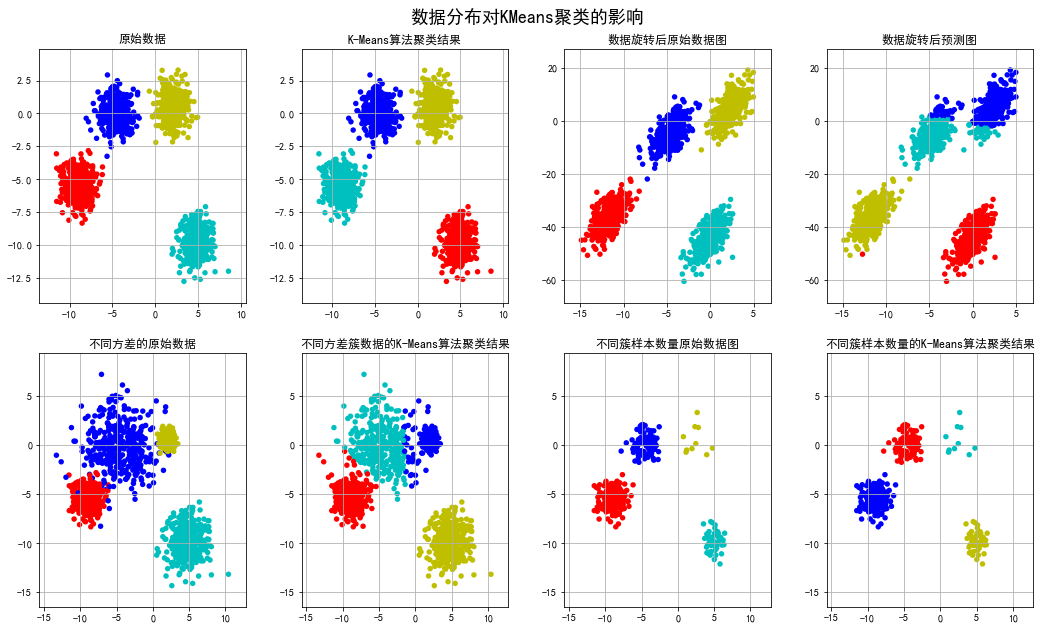

In [21]:
# 画图
cm = mpl.colors.ListedColormap(list('rgbmyc'))
# 设置背景颜色
plt.figure(figsize=(15, 9), facecolor='w')

# 子图
plt.subplot(241)
# 画点
plt.scatter(data[:, 0], data[:, 1], c=y, s=30, cmap=cm, edgecolors='none')
# 获取最大最小值
x1_min, x2_min = np.min(data, axis=0)
x1_max, x2_max = np.max(data, axis=0)
x1_min, x1_max = expandBorder(x1_min, x1_max)
x2_min, x2_max = expandBorder(x2_min, x2_max)
# 设置图表的边界
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title('原始数据')
plt.grid(True)

# 子图2
plt.subplot(242)
plt.scatter(data[:, 0], data[:, 1], c=y_hat, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title('K-Means算法聚类结果')
plt.grid(True)

m = np.array(((1,1),(0.5,5)))
data_r = data.dot(m)
y_r_hat = km.fit_predict(data_r)

plt.subplot(243)
plt.scatter(data_r[:, 0], data_r[:, 1], c=y, s=30, cmap=cm, edgecolors='none')
x1_min, x2_min = np.min(data_r, axis=0)
x1_max, x2_max = np.max(data_r, axis=0)
x1_min, x1_max = expandBorder(x1_min, x1_max)
x2_min, x2_max = expandBorder(x2_min, x2_max)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title('数据旋转后原始数据图')
plt.grid(True)

plt.subplot(244)
plt.scatter(data_r[:, 0], data_r[:, 1], c=y_r_hat, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title('数据旋转后预测图')
plt.grid(True)

plt.subplot(245)
plt.scatter(data2[:, 0], data2[:, 1], c=y2, s=30, cmap=cm, edgecolors='none')
x1_min, x2_min = np.min(data2, axis=0)
x1_max, x2_max = np.max(data2, axis=0)
x1_min, x1_max = expandBorder(x1_min, x1_max)
x2_min, x2_max = expandBorder(x2_min, x2_max)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title('不同方差的原始数据')
plt.grid(True)

plt.subplot(246)
plt.scatter(data2[:, 0], data2[:, 1], c=y_hat2, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title('不同方差簇数据的K-Means算法聚类结果')
plt.grid(True)

plt.subplot(247)
plt.scatter(data3[:, 0], data3[:, 1], c=y3, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title('不同簇样本数量原始数据图')
plt.grid(True)

plt.subplot(248)
plt.scatter(data3[:, 0], data3[:, 1], c=y_hat3, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title('不同簇样本数量的K-Means算法聚类结果')
plt.grid(True)

plt.tight_layout(2, rect=(0, 0, 1, 0.97))
plt.suptitle('数据分布对KMeans聚类的影响', fontsize=18)
plt.show()

